In [12]:
import pandas as pd 
import seaborn as sns

In [2]:
pv_df = pd.read_excel('/Users/toddhendricks/Downloads/MPVDatasetDownload.xlsx')

In [5]:
pv_df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon or Object (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko

In [7]:
charged = pv_df['Official disposition of death (justified or other)'].str.contains('Charged')

In [10]:
charged.value_counts(normalize=True)

False    0.984872
True     0.015128
Name: Official disposition of death (justified or other), dtype: float64

In [16]:
flee = pv_df['Fleeing (Source: WaPo)'].value_counts()

In [21]:
threat = pv_df['Alleged Threat Level (Source: WaPo)'].value_counts(normalize=True)

In [24]:
pv_df['Agency responsible for death'].value_counts().nlargest(10)

Los Angeles Police Department               128
Phoenix Police Department                   116
Los Angeles County Sheriff's Department      98
Chicago Police Department                    79
New York Police Department                   78
Houston Police Department                    70
Las Vegas Metropolitan Police Department     65
U.S. Marshals Service                        63
San Antonio Police Department                51
Miami-Dade Police Department                 49
Name: Agency responsible for death, dtype: int64

In [25]:
la_sheriff_df = pv_df[pv_df['Agency responsible for death'] == 'Los Angeles County Sheriff\'s Department']

In [26]:
la_sheriff_df.head(5)

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon or Object (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
260,Name withheld by police,Unknown,Male,White,NaN,2020-05-29,20th St W & W Ave K,Lancaster,CA,93534.0,...,Unarmed/Did Not Have an Actual Weapon,toy weapon,attack,NaN,No,5845.0,NaN,Suburban,8177.0,28164.0
275,Robert Avitia,18,Male,Hispanic,NaN,2020-05-26,1100 West 109th Place,Los Angeles,CA,90044.0,...,Allegedly Armed,gun,attack,Foot,No,5882.0,NaN,Urban,8152.0,28130.0
580,Raymundo Aaron Ceja,32,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-03-01,Magic Mountain Pkwy and Valencia Blvd.,Santa Clarita,CA,91355.0,...,Allegedly Armed,gun,other,Not fleeing,No,5581.0,NaN,Suburban,7849.0,27638.0
822,Name withheld by police,Unknown,Male,Hispanic,NaN,2019-12-16,3600 4th St,Los Angeles,CA,90020.0,...,Allegedly Armed,gun,attack,Foot,No,5292.0,NaN,Urban,7606.0,27163.0
917,Omar Enrique Garcia,37,Male,Hispanic,NaN,2019-11-13,4211 Dozier St,Los Angeles,CA,90063.0,...,Allegedly Armed,sword,other,Foot,No,5203.0,NaN,Urban,7510.0,27014.0


In [27]:
la_sheriff_race = la_sheriff_df['Victim\'s race'].value_counts()

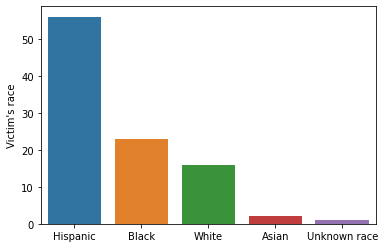

In [32]:
sns.barplot(x=la_sheriff_race.index, y=la_sheriff_race)

In [36]:
la_sheriff_df['Symptoms of mental illness?'].value_counts()

No                     58
Unknown                20
Yes                    11
Drug or alcohol use     9
Name: Symptoms of mental illness?, dtype: int64